![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [8]:
# Celda 1.1
bikes.groupby('season').total.mean()

,total
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


In [9]:
bikes['season'].describe()

,season
count,10886.000000
mean,2.506614
std,1.116174
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

,total
hour,
0,55.138462
1,33.859031
2,22.899554
3,11.757506
4,6.407240
5,19.767699
6,76.259341
7,213.116484
8,362.769231


In [10]:
bikes['hour'].describe()

,hour
count,10886.000000
mean,11.541613
std,6.915838
min,0.000000
25%,6.000000
50%,12.000000
75%,18.000000
max,23.000000


#### **ANALISIS DESCRIPTIVO**

1. La variable Season nos indica una temporada o estacion del año,donde se evidencia analizando sus quartiles que la mayoria de los datos se encuentran entre 3 y 4, adicional el promedio de esta variable es 2.51 lo que indica una inclinacion hacia la segunda mitad del año, asumiendo que el año se divide en estas 4 partes.

2. Analizado la variable Total, que nos indica el numero de bicicletas rentadas, podemos observar que al segregar esta variable por la temporada, encontramos que la temporada 1 tiene en promedio la menor cantidad de bicicletas alquiladas mientras que la 3 la mayor.

3. La variable hour nos indica las horas del dia y podemos evidenciar la cantidad promedio de bicicletas rentadas en cada hora, asi podemos concluir que la minima demanda se encuentra entre las 0 y las 5 horas, que se infiere que son las horas de la madrugada, asi mismo se ve un incremento progresivo de la demanda a partir de las 6am (76.2), encontrando asi dos picos en el alquiler de bicicletas, el primero a las 8am (362.7) que tiene sentido asumiendo que es la hora de entrada de muchos trabjadores, y el siguiente es a partir de las 5pm (468.7) que indica la hora de salida de las personas que utilizan el servicio.

4. La estadistica inferencial de esta variable nos sugiere que la mediana es a las 12, lo cual indica que la mitad de los valores ocurre antes y la otra mitad despues del medio dia, el promedio es de 11.5, lo que sugiere que se hace mas uso en horas de la mañana y la desviacion estandar de 6.9 horas indica que entre los horarios hay alta variabilidad.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

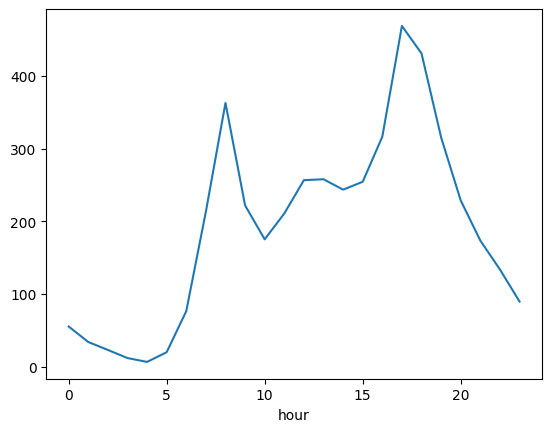

In [11]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: title={'center': 'Uso de bicicletas en invierno (Season 1)'}, xlabel='hour'>

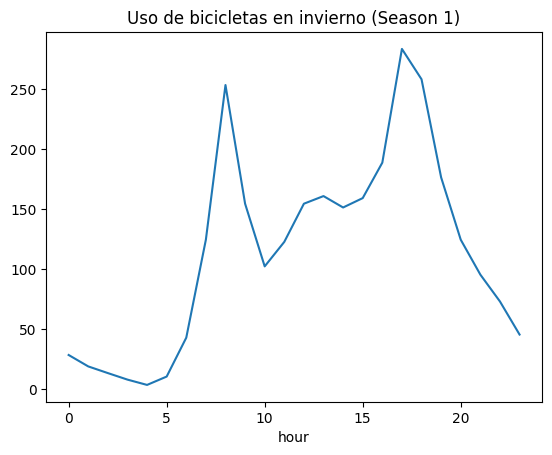

In [12]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot(title="Uso de bicicletas en invierno (Season 1)")

<Axes: title={'center': 'Uso de bicicletas en verano (Season 3)'}, xlabel='hour'>

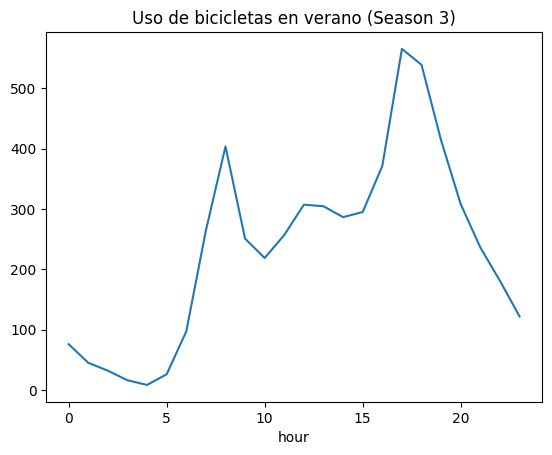

In [13]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot(title="Uso de bicicletas en verano (Season 3)")

#### **ANALISIS**
Al hacer una revision de las graficas vemos que tanto en la season 1 como en la 3 tienen un comportamiento similar durante el dia, pues vemos los mismos patrones de picos y valles.

Sin embargo cambia la cantidad de bicicletas rentadas, mientras que en la season 1 el pico maximo es de 250 bicicletas, en la season 3 es de 550 aproximadamente, lo que indica una mayor demanda en la season 3.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a un conjunto de train de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [21]:
# Celda 3

# Convertir 'season' en variables dummy
bikes_dummies = pd.get_dummies(bikes, columns=['season'], drop_first=True)

# Definir variables predictoras (X) y respuesta (y)
X = bikes_dummies[['hour', 'season_2', 'season_3', 'season_4']]
y = bikes_dummies['total']

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar validación cruzada con K=5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Modelo de regresión lineal
modelo = LinearRegression()

# Validación cruzada en el conjunto de entrenamiento
scores = cross_val_score(modelo, X_train, y_train, cv=kf, scoring='r2')

# Entrenar el modelo en los datos de entrenamiento
modelo.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
r2_test = modelo.score(X_test, y_test)

# Obtener coeficientes
coeficientes = pd.DataFrame({'Variable': X.columns, 'Coeficiente': modelo.coef_})

# Imprimir resultados
print(f'Scores de validación cruzada en train (R^2 por fold): {scores}')
print(f'Media del R^2 en train: {np.mean(scores):.4f}')
print(f'Desviación estándar del R^2 en train: {np.std(scores):.4f}')
print(f'R^2 en test: {r2_test:.4f}')
print("\nCoeficientes del modelo:")
print(coeficientes)


Scores de validación cruzada en train (R^2 por fold): [0.2152382  0.20477677 0.21752469 0.22028669 0.24599299]
Media del R^2 en train: 0.2208
Desviación estándar del R^2 en train: 0.0137
R^2 en test: 0.2302

Coeficientes del modelo:
   Variable  Coeficiente
0      hour    10.569619
1  season_2    99.106671
2  season_3   116.046340
3  season_4    84.944802


Los resultados indican un R2 bastante bajo, pues explican aproximadamente 23% de la variabilidad de los datos. La principal limitacion es que no se tienen en cuenta otras variables que pueden explicar la variable a predecir de cantidad de bicicletas rentadas, ademas puede que las relaciones entre estas variables no sean lineales.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [ ]:
# Celda 4


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [ ]:
# Celda 5


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

In [ ]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados.

Nota:

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [ ]:
# Celda 7


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9